IMPORT LIBRARIES

In [41]:
# Importing the necessary libraries

#To read excel files
import pandas as pd

#Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#Stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

FILE UPLOAD

In [3]:
#from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving INF2178_A2_data.xlsx to INF2178_A2_data.xlsx
User uploaded file "INF2178_A2_data.xlsx" with length 134310 bytes


CREATE DATA FRAME

In [ ]:
# Create data frame

assignment2_data = "INF2178_A2_data.xlsx"
data= pd.read_excel(assignment2_data)
data

EXPLORATORY DATA ANALYSIS

In [ ]:
# Breakdown of Child Care Centers by Agency Type (Auspice)

# Setting the size of the figure
plt.figure(figsize = (9, 3))

# Get the counts of unique values in the 'AUSPICE' column, and selecting the top 3
capacityType = data['AUSPICE'].value_counts().nlargest(3)

# Plot a bar chart
capacityType.plot(kind='bar', color='orange')

# Setting titles and Labels
plt.title('Agency Type')
plt.xlabel('Agency Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='center')

# Add  labels
for index, value in enumerate(capacityType):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()


In [ ]:
#Breakdown of Childcare Centers by Subsidary Received

# Create a cross tabulation of 'AUSPICE' and 'subsidy'
subsidy_auspice_ct = pd.crosstab(data['AUSPICE'], data['subsidy'], normalize='index') * 100

# Plotting the stacked bar chart
subsidy_auspice_ct.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Percentage of Agencies Receiving Subsidies by Auspice Type')
plt.xlabel('AUSPICE Type')
plt.ylabel('Percentage of Agencies (%)')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Subsidy Received', labels=['No', 'Yes'])

# Adding the percentage text on the bars
for n, x in enumerate([*subsidy_auspice_ct.index.values]):
    for (proportion, y_loc) in zip(subsidy_auspice_ct.loc[x], subsidy_auspice_ct.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%',
                 color='black', ha='center', va='center')

# Display the plot
plt.show()


# ONE-WAY ANOVA AND VISUALIZING FOR NORMAL DISTRIBUTION CHECK

In [ ]:
# Build and fit the two-way ANOVA model
model = ols('TOTSPACE ~ C(AUSPICE) * C(subsidy)', data=data).fit()

# Plotting the histogram of the residuals to show their distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='black', bins=30, edgecolor='black')

# Adding a title and labels
plt.title('Histogram of ANOVA Residuals for TOTSPACE by AUSPICE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Adding a vertical line for the mean of the residuals
plt.axvline(x=residuals.mean(), color='red', linestyle='--', linewidth=2)

# Show the plot
plt.show()

QQ PLOT

In [ ]:
# Extract the residuals
residuals = model.resid

# Generate a Q-Q plot
fig = sm.qqplot(residuals, line='s')  # line='s' draws a line to the samples
plt.title('Q-Q Plot of ANOVA Residuals for TOTSPACE by AUSPICE')
plt.show()


ONE WAY ANOVA- TABLE 1

In [47]:
# Fitting a linear regression model, Ordinary Least Squares (OLS) model where 'TOTSPACE' is the dependent variable, and 'AUSPICE' is a categorical independent variable
model = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
anovaTable = sm.stats.anova_lm(model, typ=2)
anovaTable

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


BOXPLOTS

<ipython-input-48-bb4a5be13680>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data, showmeans=True,


Auspice Means:                          AUSPICE   TOTSPACE
0              Commercial Agency  64.984424
1              Non Profit Agency  82.103841
2  Public (City Operated) Agency  47.769231
Auspice Medians:                          AUSPICE  TOTSPACE
0              Commercial Agency      58.0
1              Non Profit Agency      66.0
2  Public (City Operated) Agency      49.0


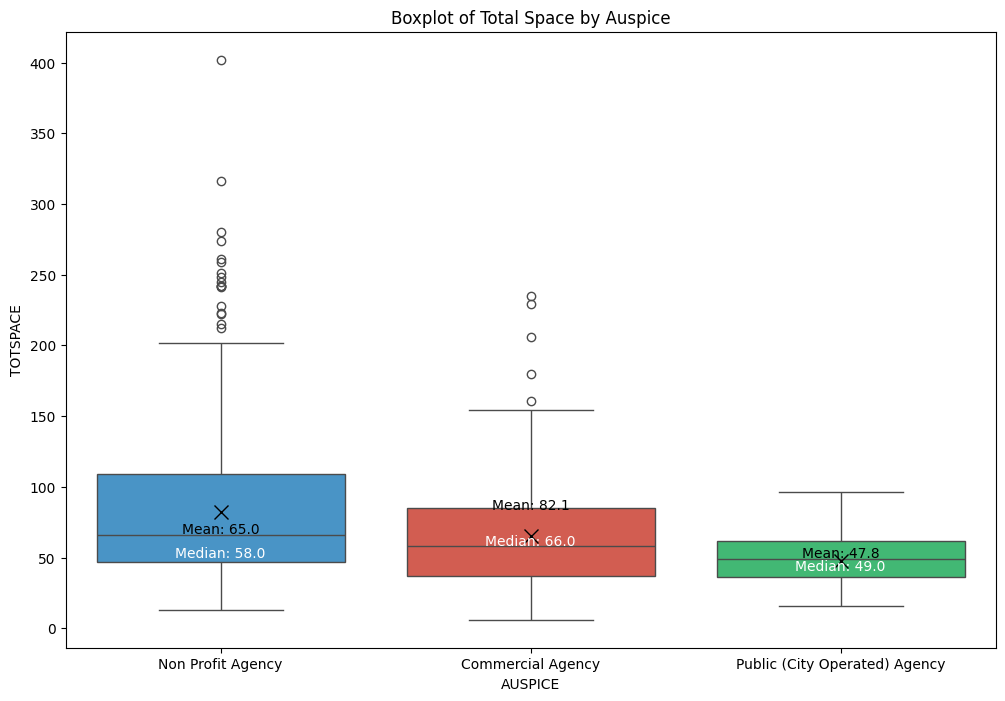

In [48]:
# Boxplot generation using Matplotlib and Seaborn

# Creating a boxplot
plt.figure(figsize=(12, 8)) # Setting the figure size
boxplot = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data, showmeans=True,
                      meanprops={"marker":"x",
                                 "markerfacecolor":"white",
                                 "markeredgecolor":"black",
                                 "markersize":"10"},
                      palette=['#3498db', '#e74c3c', '#2ecc71'])

# Calculating means and medians for each category
auspice_means = data.groupby('AUSPICE')['TOTSPACE'].mean().reset_index()
auspice_medians = data.groupby('AUSPICE')['TOTSPACE'].median().reset_index()

print("Auspice Means:", auspice_means)
print("Auspice Medians:", auspice_medians)

# Adding text annotations for mean and median
for i in range(len(auspice_means['AUSPICE'])):
    mean = auspice_means.loc[i, 'TOTSPACE']
    median = auspice_medians.loc[i, 'TOTSPACE']
    plt.text(x=i, y=mean, s=f"Mean: {mean:.1f}",
             ha='center', va='bottom', color='black')
    plt.text(x=i, y=median, s=f"Median: {median:.1f}",
             ha='center', va='top', color='white')

# Setting the title of the boxplot
plt.title('Boxplot of Total Space by Auspice')

# Displaying the plot
plt.show()

PREPARE DATA FOR TWO WAY **ANOVA**

In [49]:
# Remove NaN values
data = data.dropna(subset=['AUSPICE', 'subsidy', 'TOTSPACE'])

# Convert 'AUSPICE' and 'subsidy' to categorical data types
data['AUSPICE'] = data['AUSPICE'].astype(str).astype('category')
data['subsidy'] = data['subsidy'].astype(str).astype('category')

# Convert 'TOTSPACE' to a numeric type
data['TOTSPACE'] = pd.to_numeric(data['TOTSPACE'], errors='coerce')

TWO WAY ANOVA- using 'subsidy' and 'AUSPICE' as the categorical variables and and 'TOTSPACE' as the *quantitative* variable- TABLE 2

In [50]:
# Perform a two-way ANOVA with 'subsidy' and 'AUSPICE' as the categorical variables and 'TOTSPACE' as the quantitative variable
model = ols('TOTSPACE ~ C(subsidy) * C(AUSPICE)', data=data).fit()

# Carry out the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# Extract the label for the interaction term from the ANOVA table's index.

interaction_term = [col for col in anova_table.index if 'AUSPICE' in col and 'subsidy' in col][0]

# Check if the p-value for the interaction term in the ANOVA table is less than 0.05. If so, which would indicate a statistically significant interaction effect
if anova_table.loc[interaction_term, 'PR(>F)'] < 0.05:
    # If the interaction is significant, perform Tukey's HSD test to conduct multiple pairwise
    # comparison tests between the levels of the 'AUSPICE' factor
    tukey = pairwise_tukeyhsd(endog=data['TOTSPACE'], groups=data['AUSPICE'], alpha=0.05)

    # Output the summary of Tukey's HSD test which shows the mean difference between group levels,
    # the p-value for each test, and whether the null hypothesis can be rejected for each pairwise comparison
    print(tukey.summary())


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


CHECK ASSUMPTIONS FOR TWO WAY ANOVA

In [51]:
# Testing for normality using the Shapiro-Wilk test for each category of AUSPICE

# Convert 'AUSPICE' to a categorical variable
data['AUSPICE'] = data['AUSPICE'].astype('category')
print("Shapiro-Wilk Test for Normality")
for category in data['AUSPICE'].cat.categories:
    stat, p = shapiro(data.loc[data['AUSPICE'] == category, 'TOTSPACE'])
    print(f"AUSPICE = {category}: Statistics={stat}, p={p}")

# Testing for homogeneity of variance using Levene's test across the different AUSPICE groups
grouped_data = [data.loc[data['AUSPICE'] == category, 'TOTSPACE'] for category in data['AUSPICE'].cat.categories]
stat, p = levene(*grouped_data)
print(f"\nLevene's Test for Homogeneity of Variance: Statistics={stat}, p={p}")

# Use the model's ANOVA result to check for significance and proceed with Tukey's HSD test
if anova_table.loc['C(AUSPICE)', 'PR(>F)'] < 0.05:
    tukey_hsd = pairwise_tukeyhsd(endog=data['TOTSPACE'], groups=data['AUSPICE'], alpha=0.05)
    print("\nTukey's HSD Post-Hoc Test")
    print(tukey_hsd)

Shapiro-Wilk Test for Normality
AUSPICE = Commercial Agency: Statistics=0.9238301515579224, p=1.013540900512977e-11
AUSPICE = Non Profit Agency: Statistics=0.8917579650878906, p=8.339870811481173e-22
AUSPICE = Public (City Operated) Agency: Statistics=0.9514912962913513, p=0.09225869178771973

Levene's Test for Homogeneity of Variance: Statistics=17.927068524236084, p=2.2036889276494363e-08


<ipython-input-52-2ba0397ee82d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  interaction_plot = sns.pointplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=data, ci=None, palette='deep', markers=["o", "s"], linestyles=["-", "--"]) #ci is the confidence interval


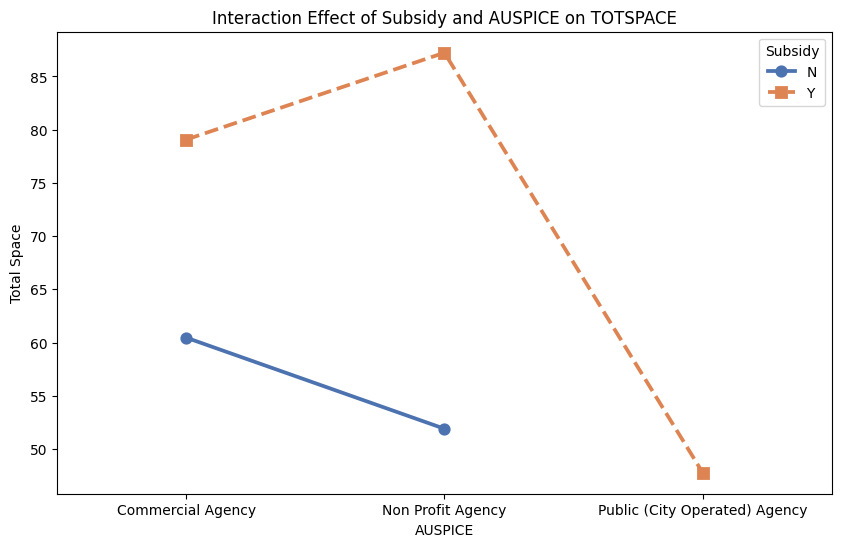

In [52]:
# Visualize the Interaction plot
plt.figure(figsize=(10, 6))
interaction_plot = sns.pointplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=data, ci=None, palette='deep', markers=["o", "s"], linestyles=["-", "--"]) #ci is the confidence interval

# Add labels and title
plt.title('Interaction Effect of Subsidy and AUSPICE on TOTSPACE')
plt.xlabel('AUSPICE')
plt.ylabel('Total Space')
plt.legend(title='Subsidy')

# Show the plot
plt.show()